<a href="https://colab.research.google.com/github/Gaurangg1404/learning-AI-ML/blob/main/tensorflow_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)


In [2]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:,0],"X1":x[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


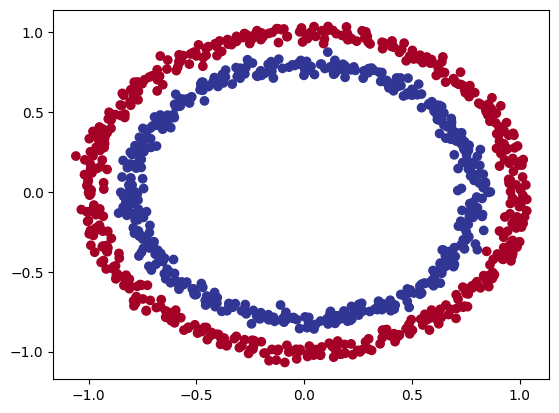

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap = plt.cm.RdYlBu);

In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
len(x), len(y)

(1000, 1000)

In [9]:
x[5], y[5]

(array([-0.47964637,  0.67643477]), 1)

In [10]:
import tensorflow as tf

In [11]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 1.0097 - accuracy: 0.4710
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4690
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4750
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4790
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4860


In [12]:
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x, y, epochs=100, verbose=0)

In [14]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [15]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [16]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x, y, epochs=100, verbose=0)

In [17]:
model_3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5110


[0.6979296207427979, 0.5109999775886536]

In [19]:
import numpy as np

In [21]:
def plot_decision_boundary(model, x, y):
  x_min, x_max = x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min, y_max = x[:,1].min()-0.1,x[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
       print("doing multiclass classification")
       y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
      print("doing binary classification")
      y_pred = np.round(y_pred).reshape(xx.shape)


  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


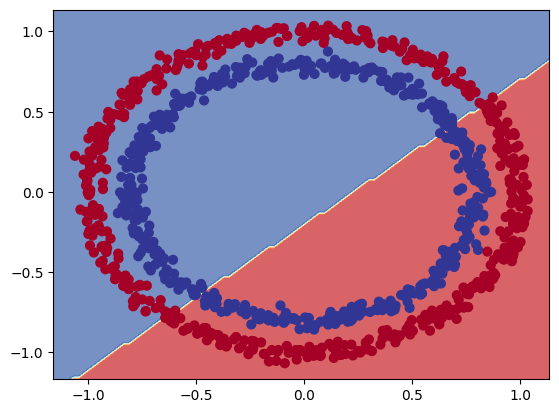

In [22]:
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y)

In [26]:
tf.random.set_seed(42)

x_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#model_3.fit(x_reg_train, y_reg_train, epochs=100)

In [28]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 6ms/step - loss: 415.9377 - mae: 415.9377
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 312.5422 - mae: 312.5422
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 213.2895 - mae: 213.2895
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 110.2388 - mae: 110.2388
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 48.8138 - mae: 48.8138
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 77.9851 - mae: 77.9851
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 66.1438 - mae: 66.1438
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6756 - mae: 43.6756
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.5668 - mae: 49.5668
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.4943 - mae: 42.4943
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 10ms/step


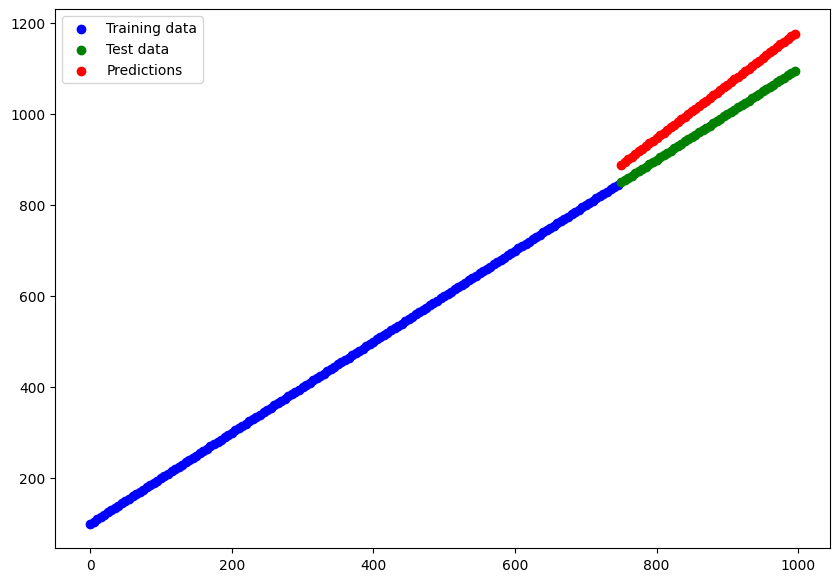

In [30]:
y_reg_preds= model_3.predict(x_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g",label="Test data")
plt.scatter(x_reg_test, y_reg_preds, c="r",label="Predictions")
plt.legend();

In [32]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.3543 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2592 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1781 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9948 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8972 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.7980 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6701 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5960 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5754 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5661 - accuracy: 0.4670
Epoch 11/

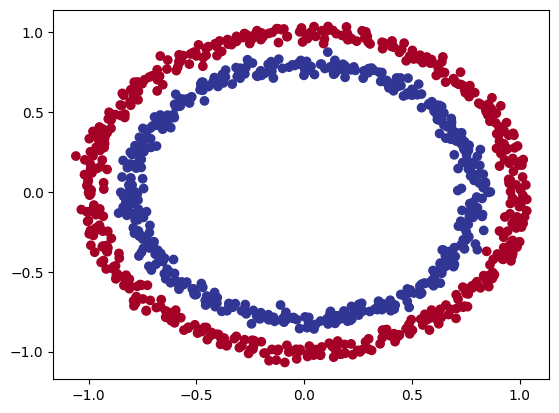

In [33]:
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classification


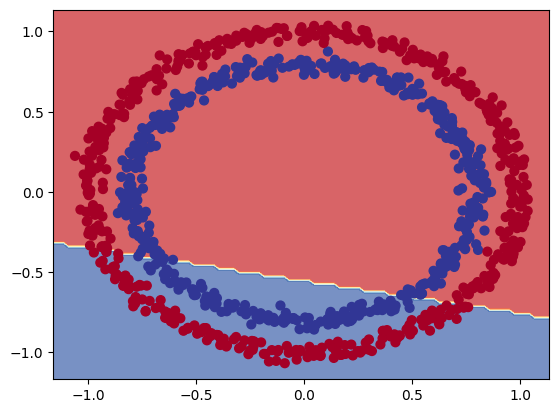

In [34]:
plot_decision_boundary(model=model_4,
                       x=x,
                       y=y)

In [35]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2736 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2123 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1447 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0771 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9989 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8686 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7856 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6722 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6293 - accuracy: 0.4640
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4858 - accuracy: 0.4570
Epoch 11/

In [40]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_6.fit(x, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.6543 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.2386 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0989 - accuracy: 0.4740
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0094 - accuracy: 0.4490
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9488 - accuracy: 0.4630
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9046 - accuracy: 0.4600
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8717 - accuracy: 0.4450
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.4500
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8266 - accuracy: 0.4260
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8095 - accuracy: 0.4140
Epoch 11/

In [41]:
model_6.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8180


[0.3416997790336609, 0.8180000185966492]

313/313 [==============================] - 1s 2ms/step
doing binary classification


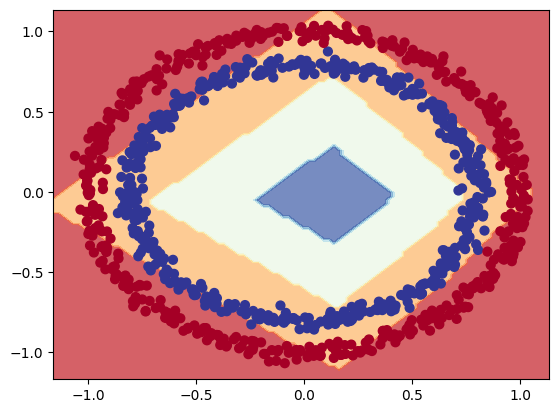

In [42]:
plot_decision_boundary(model_6, x, y)

In [43]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_6.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8220
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8180
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8200
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8170
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8170
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8180
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8250
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.8210
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8190
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3316 - accuracy: 0.8210
Epoch 11/

In [44]:
model_7.evaluate(x,y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6997 - accuracy: 0.5020


[0.699734628200531, 0.5019999742507935]

313/313 [==============================] - 1s 2ms/step
doing binary classification


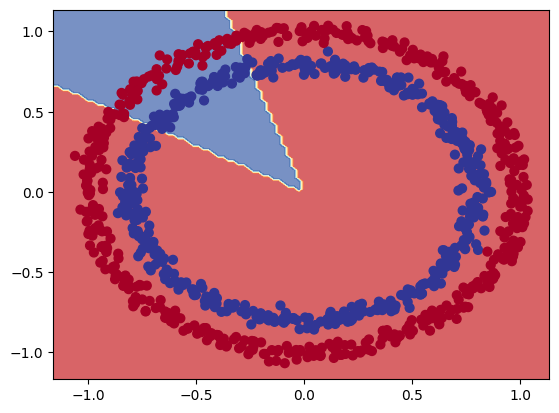

In [45]:
plot_decision_boundary(model_7,x,y)

In [46]:
a=tf.cast(tf.range(-10,10),tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

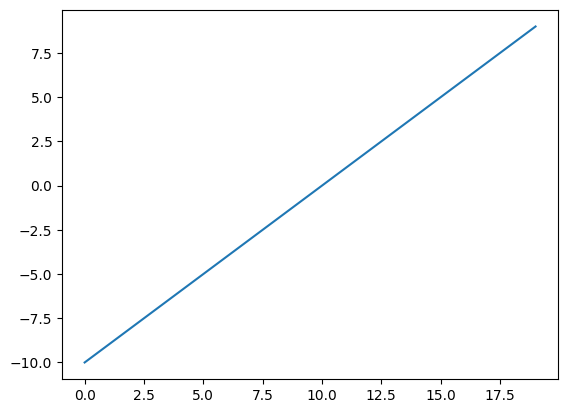

In [47]:
plt.plot(a)

In [48]:
def sigmoid(x):
  return 1/(1 + tf.exp(-x))


sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

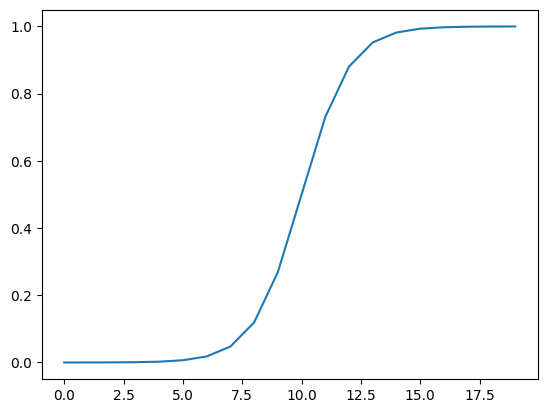

In [49]:
plt.plot(sigmoid(a))

In [50]:
def relu(x):
  return tf.maximum(0,x)

relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

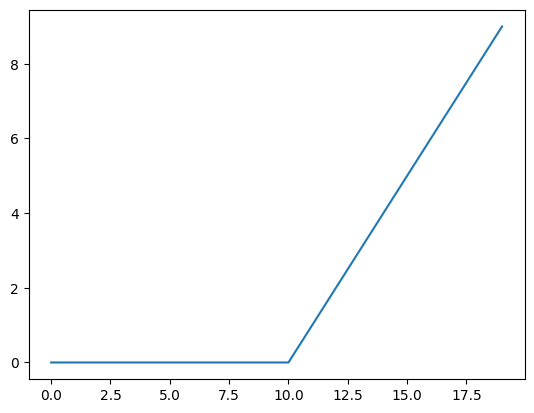

In [51]:
plt.plot(relu(a))

In [52]:
tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

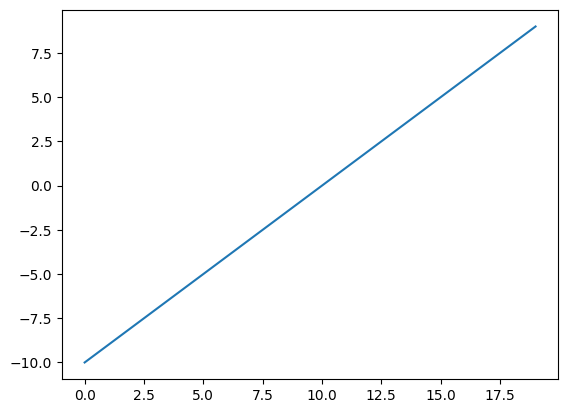

In [53]:
plt.plot(tf.keras.activations.linear(a))

In [54]:
a == tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>